In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA, NMF
import os
%matplotlib inline

In [3]:
df = pd.read_csv('data_number_nine.csv', header='infer')

In [5]:
df.shape

(23, 23)

In [7]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.006,0.006,0.006,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.006,0.006
1,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.0050,0.005,0.005,0.005
2,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.0050,0.0050,...,0.7854,0.7776,0.3738,0.1486,0.0050,0.0050,0.0050,0.005,0.005,0.005
3,0.005,0.005,0.005,0.005,0.005,0.005,0.0050,0.005,0.1797,0.5951,...,0.9911,0.9911,0.9911,0.9756,0.8242,0.5912,0.0283,0.005,0.005,0.005
4,0.005,0.005,0.005,0.005,0.005,0.005,0.1836,0.599,0.9368,0.9911,...,0.5214,0.6099,0.7815,0.9911,0.8941,0.8785,0.4088,0.005,0.005,0.005


In [34]:
# Define a suitable visualization function based on imshow().
# Visualizes the whole dataset at once as pixel image.
def ShowMe(X):
    Y= 1.0 - X
    plt.imshow(Y, cmap='gray')
    plt.show()


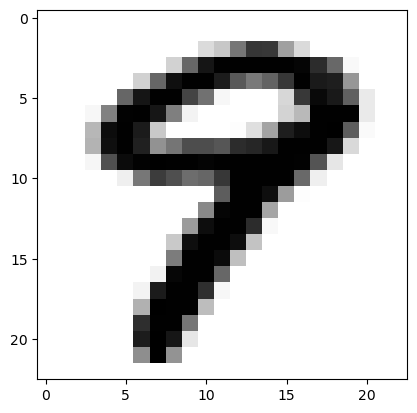

In [23]:
X = np.array(df)
ShowMe(X)

In [40]:
# Define a function that returns reduced dimensional input.
def reducedInputPCA(X,nPC):
    pca = PCA(n_components = nPC) # Define a PCA␣↪object for a given number of target PCs.
    X_pca = pca.fit_transform(X) # Get the␣↪transformed scores.
    return pca.inverse_transform(X_pca) # Bring back the␣↪transformed scores to the original coordinate system.

N# of PCs = 23


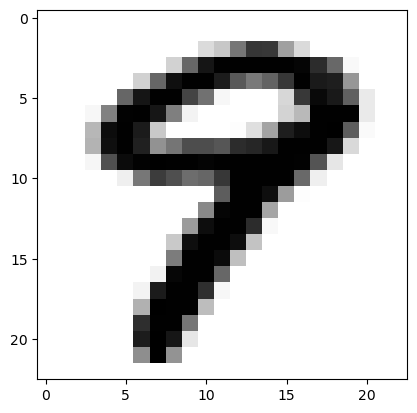

N# of PCs = 10


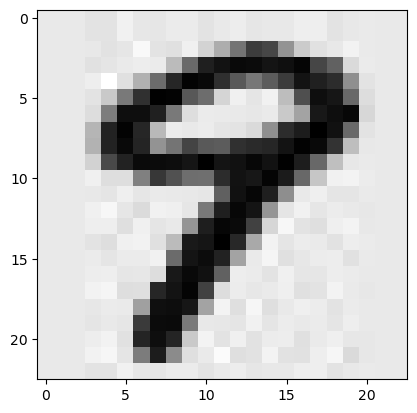

N# of PCs = 5


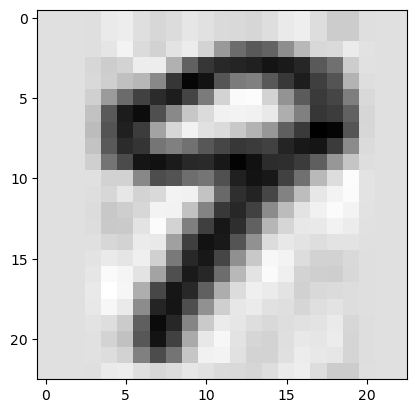

N# of PCs = 3


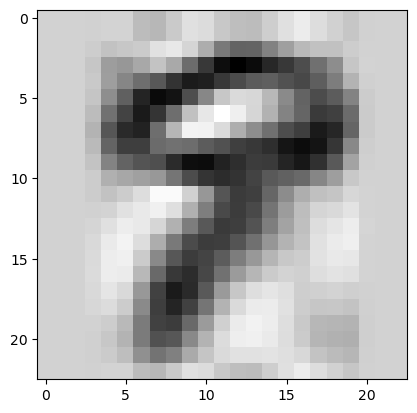

N# of PCs = 1


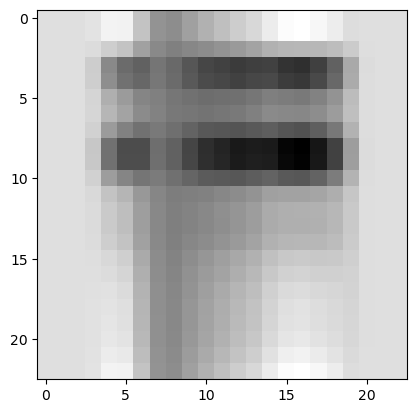

In [42]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedInputPCA(X,nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)

In [44]:
pca = PCA(n_components = 23) # Define a PCA object.
pca.fit(X)

PCA(n_components=23)

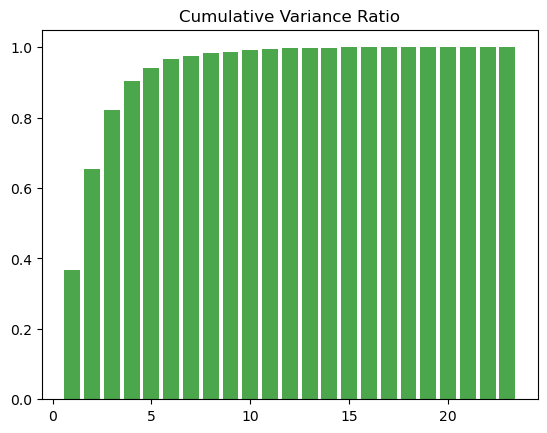

In [46]:
# Visualize the CVRs as a Barplot.
CVRs = np.cumsum(pca.explained_variance_ratio_) # Calculate the CVRs.
nPCs = np.arange(23)+1 # Define an array that␣↪corresponds to the number of PCs.
plt.bar(nPCs,CVRs,color = 'green', alpha=0.7)
plt.title('Cumulative Variance Ratio')
plt.show()

In [48]:
# Define a function that returns reduced dimensional input.
def reducedInputNMF(X,n):
    nmf = NMF(n_components=n, init='random', random_state=0) # Define a␣↪NMF object for a given number of target components.
    X_nmf = nmf.fit_transform(X) # Get the␣↪transformed scores.
    return nmf.inverse_transform(X_nmf) # Bring back␣↪the transformed scores to the original coordinate system.

N# of Components = 23


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


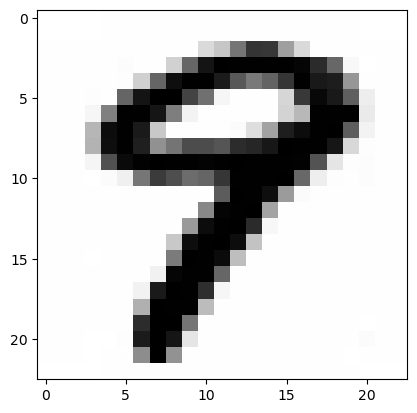

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


N# of Components = 10


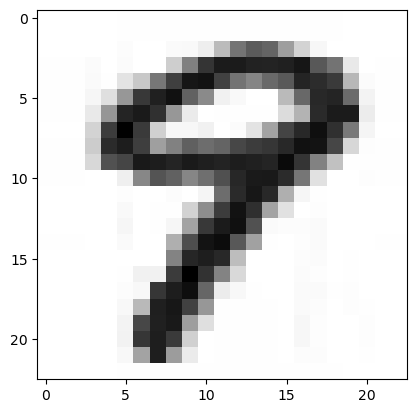

N# of Components = 5


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


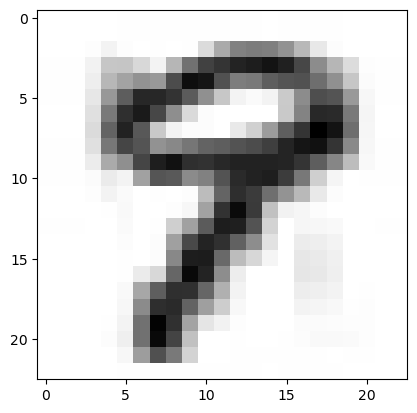

N# of Components = 3


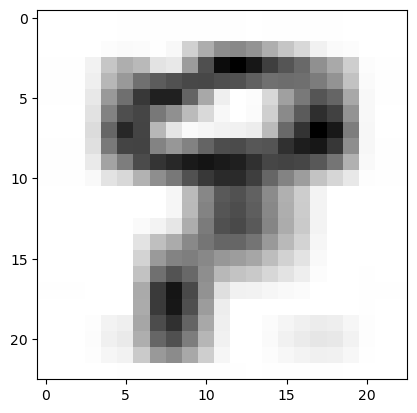

N# of Components = 1


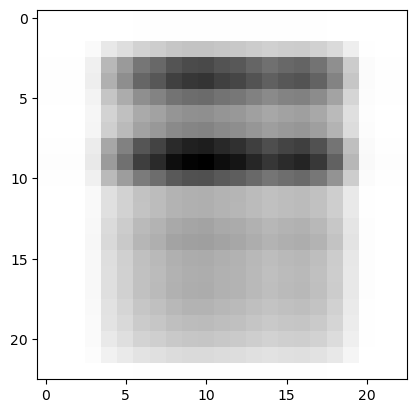

In [50]:
# Visualize the reduced dimensional input for different cases.
# As we shrink the dimension, the image gets less clear.
for n in [23, 10, 5, 3, 1]:
    Z = reducedInputNMF(X,n)
    print( "N# of Components = " + str(n))
    ShowMe(Z)

In [52]:
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 5,random_state=123)
X.shape

(150, 8)

In [ ]:
# Define a custom color palette.
myColors = {0:'red',1:'green',2:'blue'}
labelColors = pd.Series(label).apply(lambda x: myColors[x])